# Simulate current injections into one or more neurons in a network

First we define the network. Generating the network is relatively fast, so you can generate a larger network. Simulating the full network is slower, so by default only the neurons receiving a current injection, and their post synaptic targets are simulated.

In the cell below we define the number of neurons we want, and the volume we place them inside.

In [1]:
import os

n_dSPN = 4
n_iSPN = 4
n_FS = 4
n_LTS = 1
n_ChIN = 0

snudda_data = "../../../BasalGangliaData/data/"
network_path = os.path.join("networks","pair_recording_simulation")
volume_type="cube"
side_len = 100e-6

Snudda init writes the ```network-config.json``` file.

In [2]:
from snudda.init.init import SnuddaInit
cnc = SnuddaInit(struct_def={}, network_path=network_path, random_seed=13371, snudda_data=snudda_data)
cnc.define_striatum(num_dSPN=n_dSPN, num_iSPN=n_iSPN, num_FS=n_FS, num_LTS=n_LTS, num_ChIN=n_ChIN,
                    volume_type="cube", side_len=side_len)
cnc.write_json()

Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum
Adding neurons: FS from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/fs
Adding neurons: dSPN from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/dspn
Adding neurons: iSPN from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/ispn
ChIN: Skipping neuron because, num_neurons =0
Adding neurons: LTS from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/lts
No directory $SNUDDA_DATA/neurons/striatum/ngf, skipping NGF cells.
Writing networks/pair_recording_simulation/network-config.json


In [3]:
from snudda import Snudda
snd = Snudda(network_path=network_path)
snd.create_network()

Placing neurons
Network path: networks/pair_recording_simulation
Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/data from networks/pair_recording_simulation/network-config.json
Generating 179 points for networks/pair_recording_simulation/mesh/Striatum-cube-mesh-5.4456428798476186e-05.obj
n_points = 170, previous close_pairs = 314
n_points = 161, previous close_pairs = 251
n_points = 153, previous close_pairs = 205
n_points = 145, previous close_pairs = 171
n_points = 138, previous close_pairs = 140
n_points = 131, previous close_pairs = 116
n_points = 125, previous close_pairs = 97
n_points = 119, previous close_pairs = 79
n_points = 114, previous close_pairs = 63
n_points = 110, previous close_pairs = 52
n_points = 106, previous close_pairs = 44
n_points = 102, previous close_pairs = 36
n_points = 99, previous close_pairs = 28
n_points = 97, previous close_pairs = 22
n_points = 79, previous close_pairs = 18
Filtering 79 points..
Filtering, keeping inside points: 17 / 79
stop_pa

Snudda Place, Detect and Prune. Here the neurons are placed in the network, synapse touch detection is done, and finally pruning of the putative synapses.

In [4]:
!snudda_load networks/pair_recording_simulation/network-synapses.hdf5 --listN

Loading networks/pair_recording_simulation/network-synapses.hdf5
Loading config data from HDF5
Loading 13 neurons with 235 synapses and 22 gap junctions
Load done. 0.0
Neurons in network: 
0 : dSPN_0 [0] (x: 0.004731, y: 0.003981, z: 0.007728)
1 : iSPN_2 [0] (x: 0.004735, y: 0.004002, z: 0.007724)
2 : LTS_0 [0] (x: 0.004740, y: 0.003995, z: 0.007744)
3 : iSPN_3 [0] (x: 0.004737, y: 0.003981, z: 0.007754)
4 : FS_3 [0] (x: 0.004725, y: 0.004015, z: 0.007728)
5 : FS_1 [0] (x: 0.004724, y: 0.004001, z: 0.007759)
6 : iSPN_1 [0] (x: 0.004764, y: 0.003992, z: 0.007747)
7 : iSPN_0 [0] (x: 0.004769, y: 0.003976, z: 0.007742)
8 : FS_2 [0] (x: 0.004770, y: 0.003995, z: 0.007724)
9 : dSPN_1 [0] (x: 0.004758, y: 0.004015, z: 0.007737)
10 : dSPN_3 [0] (x: 0.004743, y: 0.004014, z: 0.007764)
11 : FS_0 [0] (x: 0.004724, y: 0.004026, z: 0.007764)
12 : dSPN_2 [0] (x: 0.004773, y: 0.003985, z: 0.007776)


### Verify connections

Make sure that the synapses you record from in ```experiment-config-7.json``` exist! If the network is regenerated with a different random seed, or with a different version, it might differ.

In [5]:
!snudda_load networks/pair_recording_simulation/network-synapses.hdf5 --listPost 4

Loading networks/pair_recording_simulation/network-synapses.hdf5
Loading config data from HDF5
Loading 13 neurons with 235 synapses and 22 gap junctions
Load done. 0.0
List neurons post-synaptic to neuron_id = 4 (FS_3):
Finding synapses originating from 4, this is slow
The neuron makes 70 synapses on other neurons
0 : dSPN_0 (8 synapses)
1 : iSPN_2 (9 synapses)
5 : FS_1 (6 synapses)
6 : iSPN_1 (10 synapses)
7 : iSPN_0 (6 synapses)
9 : dSPN_1 (11 synapses)
10 : dSPN_3 (8 synapses)
11 : FS_0 (6 synapses)
12 : dSPN_2 (6 synapses)


We compile the neuron mechanisms for the simulation. Here we just use the default mechanisms provided.

!nrnivmodl ../../snudda/data/neurons/mechanisms

In [6]:
os.system(f"nrnivmodl {snudda_data}/neurons/mechanisms")

/home/hjorth/HBP/Snudda/examples/notebooks
Mod files: "../../../BasalGangliaData/data//neurons/mechanisms/../../../BasalGangliaData/data//neurons/mechanisms/bk_ch.mod" "../../../BasalGangliaData/data//neurons/mechanisms/../../../BasalGangliaData/data//neurons/mechanisms/bk_fs.mod" "../../../BasalGangliaData/data//neurons/mechanisms/../../../BasalGangliaData/data//neurons/mechanisms/bk_ms.mod" "../../../BasalGangliaData/data//neurons/mechanisms/../../../BasalGangliaData/data//neurons/mechanisms/ca_ch.mod" "../../../BasalGangliaData/data//neurons/mechanisms/../../../BasalGangliaData/data//neurons/mechanisms/cadyn_fs.mod" "../../../BasalGangliaData/data//neurons/mechanisms/../../../BasalGangliaData/data//neurons/mechanisms/cadyn_ms.mod" "../../../BasalGangliaData/data//neurons/mechanisms/../../../BasalGangliaData/data//neurons/mechanisms/cal12_ms.mod" "../../../BasalGangliaData/data//neurons/mechanisms/../../../BasalGangliaData/data//neurons/mechanisms/cal13_ms.mod" "../../../BasalGanglia

0

Run the NEURON simulation of the network. The setup is defined in the [experiment-config-7.json](../../snudda/data/experiment_config/pair_recording/experiment-config-7.json) file.

In [7]:
from snudda.simulate.pair_recording import PairRecording 
experiment_config_file = os.path.join("..","..", "snudda", "data", "experiment_config", "pair_recording", "experiment-config-7.json")
pr = PairRecording(network_path=network_path, experiment_config_file=experiment_config_file, verbose=True)

Pair recording output file: networks/pair_recording_simulation/simulation/network-output-7.hdf5
Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/data from networks/pair_recording_simulation/network-config.json
Using network_file: networks/pair_recording_simulation/network-synapses.hdf5
Using input_file: None
Using output_file: networks/pair_recording_simulation/simulation/network-output-7.hdf5
Using logFile: networks/pair_recording_simulation/log/simulation-log.txt-0
Worker 0 : Loading network from networks/pair_recording_simulation/network-synapses.hdf5
Loading config file networks/pair_recording_simulation/network-config.json
Simulating neuron IDs {0, 1, 4, 5, 6, 7, 9, 10, 11, 12}
Marking synapses for recording: 4 -> 0
Marking synapses for recording: 4 -> 1
Marking synapses for recording: 4 -> 5
Marking synapses for recording: 4 -> 6
Marking synapses for recording: 4 -> 7
Marking synapses for recording: 4 -> 9
Marking synapses for recording: 4 -> 10
Marking synapses for recordin

In [8]:
pr.run()

Neuron dSPN_0 (0) resting voltage = -80.0
Neuron iSPN_2 (1) resting voltage = -80.0
Neuron FS_3 (4) resting voltage = -80.0
Neuron FS_1 (5) resting voltage = -80.0
Neuron iSPN_1 (6) resting voltage = -80.0
Neuron iSPN_0 (7) resting voltage = -80.0
Neuron dSPN_1 (9) resting voltage = -80.0
Neuron dSPN_3 (10) resting voltage = -80.0
Neuron FS_0 (11) resting voltage = -80.0
Neuron dSPN_2 (12) resting voltage = -80.0
Running simulation for 4.0 s
Running Neuron simulator 4000 ms, with dt=0.025
1% done. Elapsed: 1.9 s, estimated time left: 191.5 s
2% done. Elapsed: 3.9 s, estimated time left: 189.0 s
3% done. Elapsed: 5.8 s, estimated time left: 187.8 s
4% done. Elapsed: 7.7 s, estimated time left: 186.0 s
5% done. Elapsed: 9.6 s, estimated time left: 182.9 s
6% done. Elapsed: 11.5 s, estimated time left: 180.6 s
7% done. Elapsed: 13.4 s, estimated time left: 178.3 s
8% done. Elapsed: 15.3 s, estimated time left: 176.4 s
9% done. Elapsed: 17.3 s, estimated time left: 174.6 s
10% done. Elapse

## Plot the results

First we start with an overview trace of all the neurons that receive a current injection, and their post synaptic targets.

Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
Failed sanity check on neuron ID, not all neurons simulated? [ 0  1  4  5  6  7  9 10 11 12]
Plotting traces: [0, 1, 10, 11, 12, 4, 5, 6, 7, 9]
Plotted 10 traces (total 10)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/networks/pair_recording_simulation/figures/Network-voltage-trace-Example7-FS-iSPN-dSPN.pdf


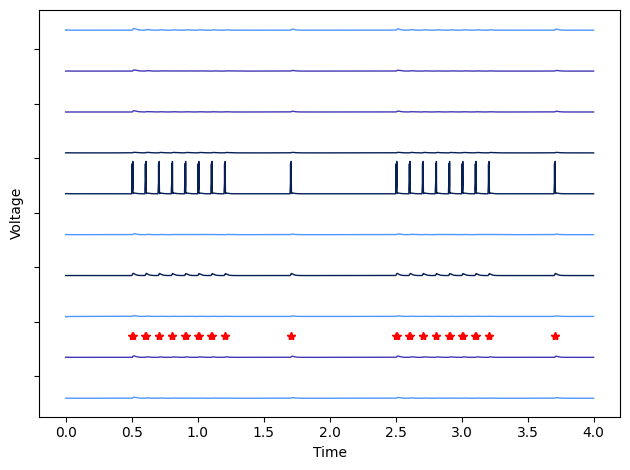

In [9]:
%matplotlib inline
pr.plot_trace_overview()

We can also plot the individual post synaptic traces, with the current pulses marked.

Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
Failed sanity check on neuron ID, not all neurons simulated? [ 0  1  4  5  6  7  9 10 11 12]
!!! Excluding first 0.25 s from the plot
Plotting traces: [0]
Plotted 1 traces (total 10)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/networks/pair_recording_simulation/figures/Current-injection-Example7-pre-4-post-0.pdf


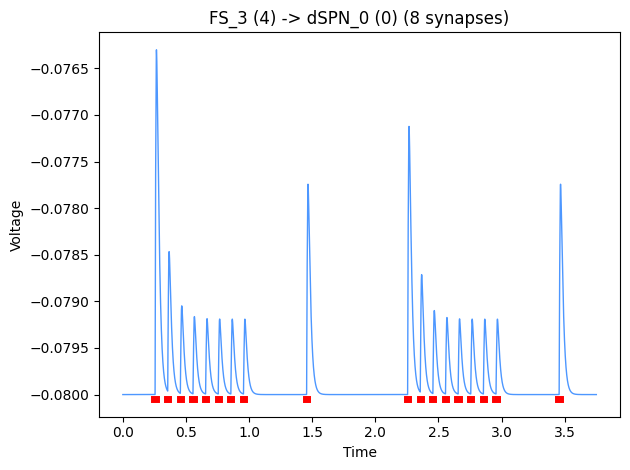

Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
Failed sanity check on neuron ID, not all neurons simulated? [ 0  1  4  5  6  7  9 10 11 12]
!!! Excluding first 0.25 s from the plot
Plotting traces: [1]
Plotted 1 traces (total 10)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/networks/pair_recording_simulation/figures/Current-injection-Example7-pre-4-post-1.pdf


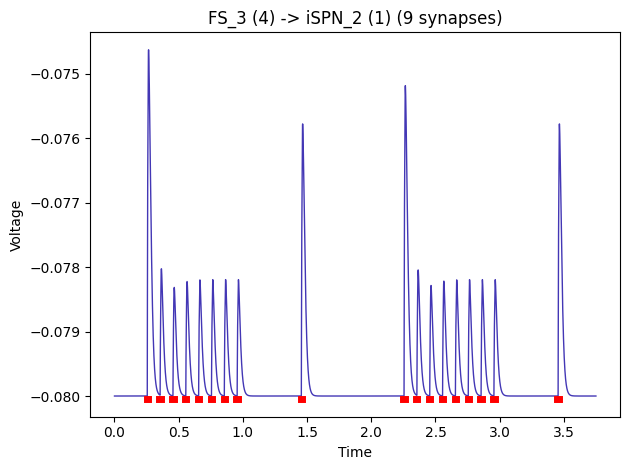

Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
Failed sanity check on neuron ID, not all neurons simulated? [ 0  1  4  5  6  7  9 10 11 12]
!!! Excluding first 0.25 s from the plot
Plotting traces: [5]
Plotted 1 traces (total 10)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/networks/pair_recording_simulation/figures/Current-injection-Example7-pre-4-post-5.pdf


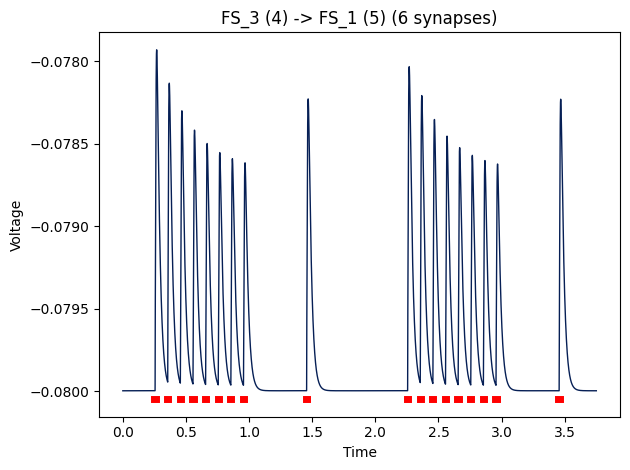

Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
Failed sanity check on neuron ID, not all neurons simulated? [ 0  1  4  5  6  7  9 10 11 12]
!!! Excluding first 0.25 s from the plot
Plotting traces: [6]
Plotted 1 traces (total 10)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/networks/pair_recording_simulation/figures/Current-injection-Example7-pre-4-post-6.pdf


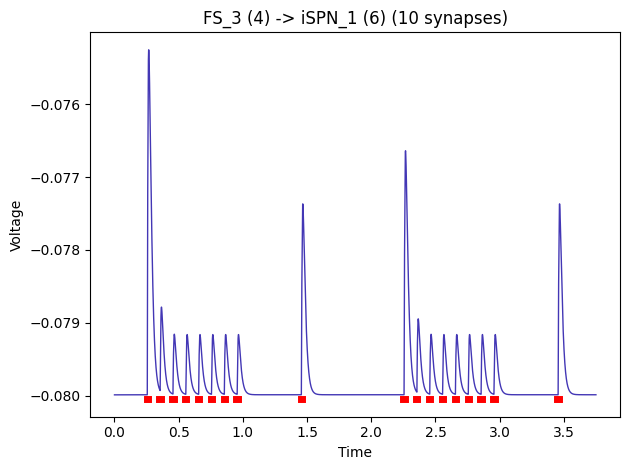

Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
Failed sanity check on neuron ID, not all neurons simulated? [ 0  1  4  5  6  7  9 10 11 12]
!!! Excluding first 0.25 s from the plot
Plotting traces: [7]
Plotted 1 traces (total 10)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/networks/pair_recording_simulation/figures/Current-injection-Example7-pre-4-post-7.pdf


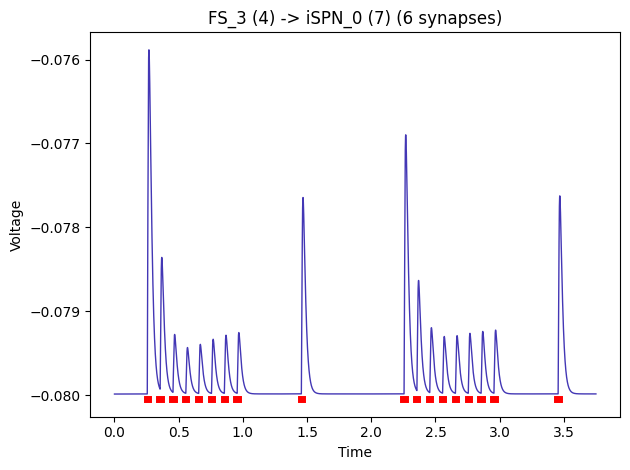

Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
Failed sanity check on neuron ID, not all neurons simulated? [ 0  1  4  5  6  7  9 10 11 12]
!!! Excluding first 0.25 s from the plot
Plotting traces: [9]
Plotted 1 traces (total 10)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/networks/pair_recording_simulation/figures/Current-injection-Example7-pre-4-post-9.pdf


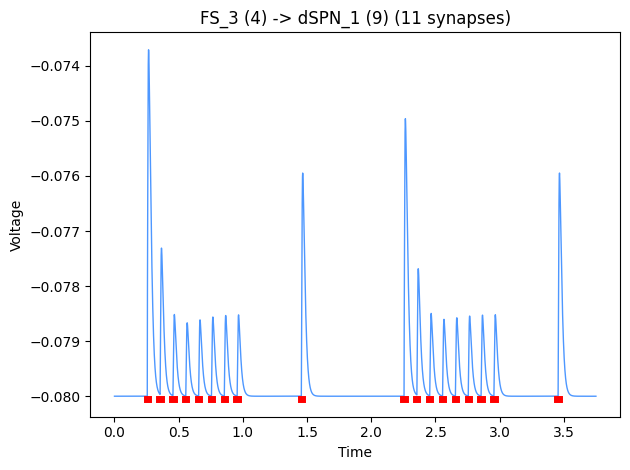

Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
Failed sanity check on neuron ID, not all neurons simulated? [ 0  1  4  5  6  7  9 10 11 12]
!!! Excluding first 0.25 s from the plot
Plotting traces: [10]
Plotted 1 traces (total 10)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/networks/pair_recording_simulation/figures/Current-injection-Example7-pre-4-post-10.pdf


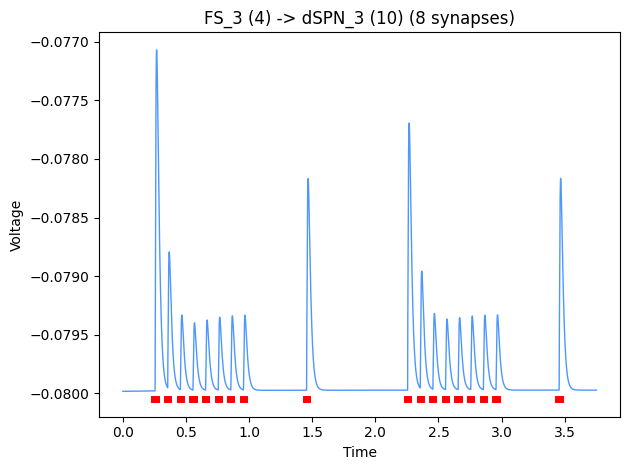

Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
Failed sanity check on neuron ID, not all neurons simulated? [ 0  1  4  5  6  7  9 10 11 12]
!!! Excluding first 0.25 s from the plot
Plotting traces: [11]
Plotted 1 traces (total 10)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/networks/pair_recording_simulation/figures/Current-injection-Example7-pre-4-post-11.pdf


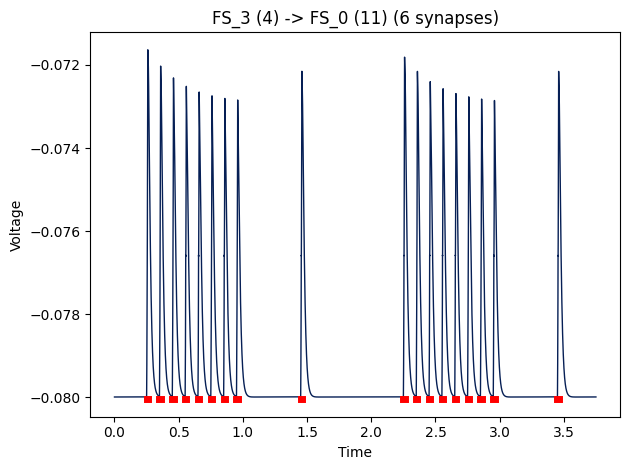

Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
Failed sanity check on neuron ID, not all neurons simulated? [ 0  1  4  5  6  7  9 10 11 12]
!!! Excluding first 0.25 s from the plot
Plotting traces: [12]
Plotted 1 traces (total 10)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/networks/pair_recording_simulation/figures/Current-injection-Example7-pre-4-post-12.pdf


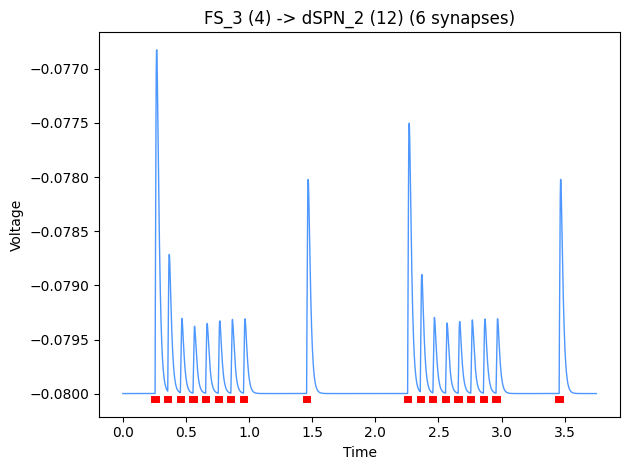

In [10]:
%matplotlib inline
pr.plot_traces()

Skipping trace 0, not in trace_id=[12]
Skipping trace 1, not in trace_id=[12]
Skipping trace 5, not in trace_id=[12]
Skipping trace 6, not in trace_id=[12]
Skipping trace 7, not in trace_id=[12]
Skipping trace 9, not in trace_id=[12]
Skipping trace 10, not in trace_id=[12]
Skipping trace 11, not in trace_id=[12]
Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
Failed sanity check on neuron ID, not all neurons simulated? [ 0  1  4  5  6  7  9 10 11 12]
!!! Excluding first 0.25 s from the plot
Plotting traces: [12]
Plotted 1 traces (total 10)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/networks/pair_recording_simulation/figures/Current-injection-Example7-pre-4-post-12.pdf


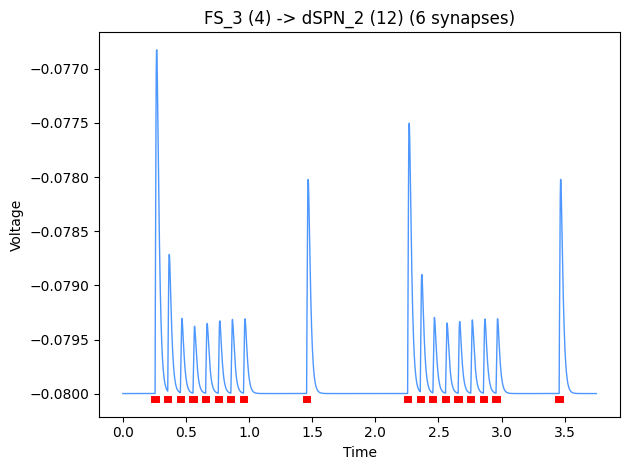

In [11]:
pr.plot_traces(trace_id=[12])

In [12]:
!snudda_load networks/pair_recording_simulation/network-synapses.hdf5 --listPre 12

Loading networks/pair_recording_simulation/network-synapses.hdf5
Loading config data from HDF5
Loading 13 neurons with 235 synapses and 22 gap junctions
Load done. 0.0
List neurons pre-synaptic to neuron_id = 12 (dSPN_2)
The neuron receives 17 synapses
4 : FS_3 (6 synapses)
5 : FS_1 (3 synapses)
9 : dSPN_1 (3 synapses)
11 : FS_0 (5 synapses)


### Plotting synaptic currents

Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
Failed sanity check on neuron ID, not all neurons simulated? [ 0  1  4  5  6  7  9 10 11 12]


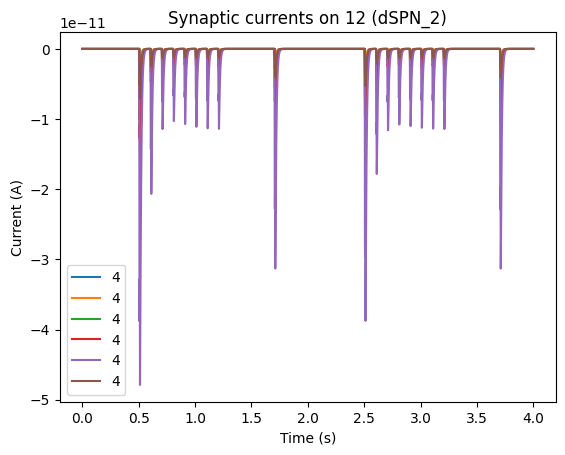

<Figure size 640x480 with 0 Axes>

In [13]:
pr.plot_synaptic_currents(post_id=12)

Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
Failed sanity check on neuron ID, not all neurons simulated? [ 0  1  4  5  6  7  9 10 11 12]


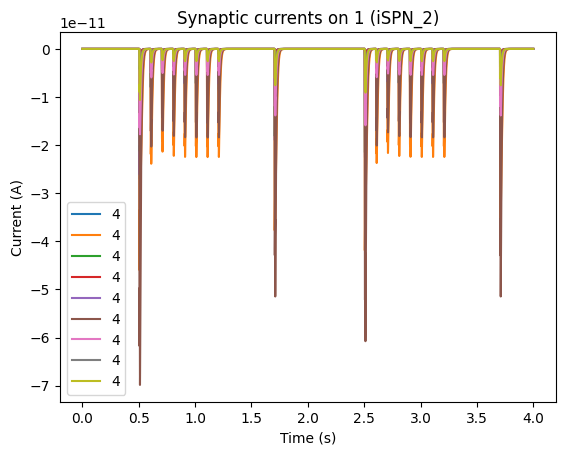

<Figure size 640x480 with 0 Axes>

In [15]:
pr.plot_synaptic_currents(post_id=1)

Loading network info from networks/pair_recording_simulation/network-synapses.hdf5
Loading networks/pair_recording_simulation/simulation/network-output-7.hdf5
Failed sanity check on neuron ID, not all neurons simulated? [ 0  1  4  5  6  7  9 10 11 12]


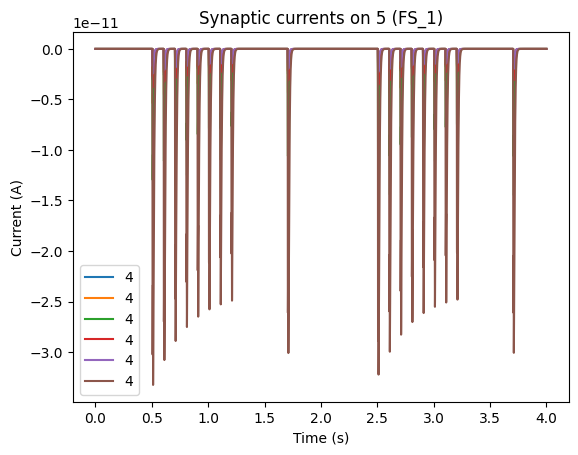

<Figure size 640x480 with 0 Axes>

In [16]:
pr.plot_synaptic_currents(post_id=5)